複素関数の可視化
===
---
#### 参考
- [1] [Domain Coloring - Wikipedia](https://en.wikipedia.org/wiki/Domain_coloring)
- [2] [Visualizing Complex Functions](https://www.codeproject.com/Articles/80641/Visualizing-Complex-Functions)
- [3] [Visualizing Functions of a Complex Variable](https://www.pacifict.com/ComplexFunctions.html)

## 1. 準備

### 1. 1. import

In [1]:
import numpy as np
from scipy import special
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
%matplotlib inline

### 1.2. 複素数
Pythonではデフォルトで使うことができる

In [2]:
z1 = 2 + 3j
print z1
print type(z1)
print np.exp(z1)

(2+3j)
<type 'complex'>
(-7.3151100949+1.04274365624j)


## 2. 複素関数のDomain Coloring
### 2.1. 原理
複素数 $z = x + iy$ が複素関数 $f(z)$ によって $f(z) = u + iv$ に移されるとする。

このとき、$f(z) = u + iv$ の偏角 $\phi = arg(u+iv)$ に基づいて色相を定め、複素数平面の点$(x, y)$を（ $(u, v)$でないことに注意 ）その色で塗るのがDomain Coloringである。

### 2.2. 実装

In [3]:
figsize(6, 6)
def plot_complex(complex_func):
    """ 複素関数を受けてDomain Coloringを行う関数 """
    x, y = np.meshgrid(np.linspace(-4, 4, 400), np.linspace(-4, 4, 400))
    z = x + y*1j
    
    angles = (np.angle(complex_func(z)) + 2*np.pi) % (2*np.pi) # pi関連は、偏角をx軸基準で時計回りにするための調整
    im = plt.imshow(angles, origin="lower", cmap="hsv") # origin="lower": y軸を上向きにする
    plt.axis('off') # 軸の数値を非表示
    plt.colorbar(im, fraction=0.046, pad=0.04) # colorbarの高さを画像に合わせている

## 2.3. 結果
まずは恒等写像をプロットしてみる。`plot_complex()`の引数には関数を与える必要があるので、ここでは無名関数を使う。

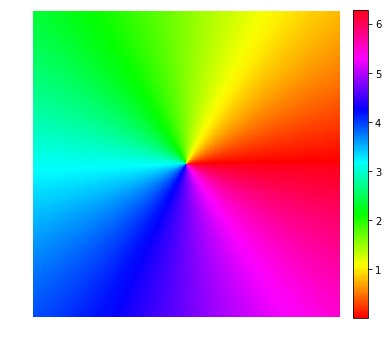

In [4]:
plot_complex(lambda z: z)

単なるカラーピッカーのようになっていることが分かる。Domain Coloringは、このカラーピッカーが複素関数によってどのように歪められているかを可視化したものであると考えることができる。（というか、変換先の偏角に応じて色分けしているので、Domain Coloringの図を複素関数によって歪めるとカラーピッカーになる感じ？）

もう少し複雑な関数をplotしてみる：

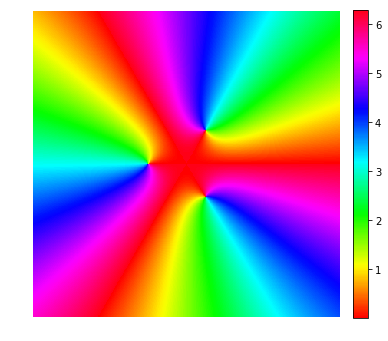

In [5]:
plot_complex(lambda z: z**3 + 1)

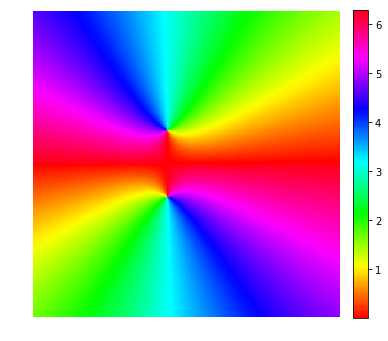

In [6]:
plot_complex(lambda z: (z**3-1)/(z-1))

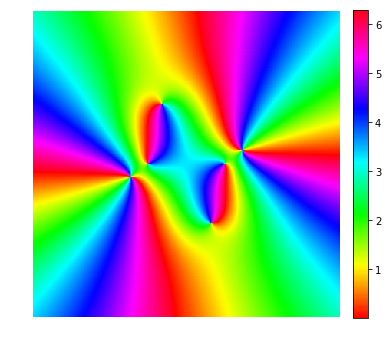

In [7]:
plot_complex(lambda z: (z*z-1)*(z*z-2-1j)**2 / (z*z+2+2j))

Numpyの関数は複素数に対応しているっぽいので、無名関数を使わなくても以下のように実行することができる。

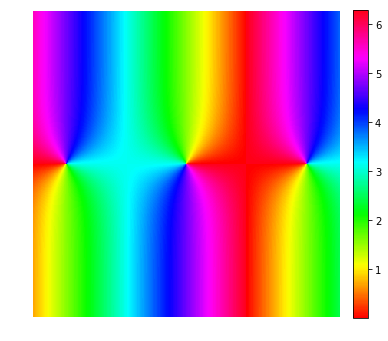

In [8]:
plot_complex(np.sin)

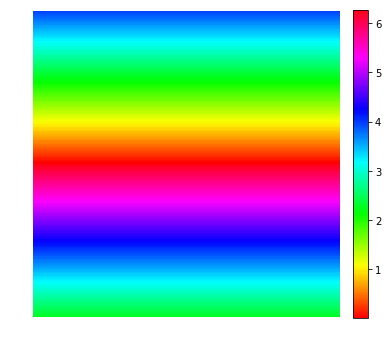

In [9]:
plot_complex(np.exp)

`from scipy import special`をしておけば、以下のように複雑な関数を扱うこともできる。

[ディガンマ関数 - Wikipedia](https://ja.wikipedia.org/wiki/%E3%83%87%E3%82%A3%E3%82%AC%E3%83%B3%E3%83%9E%E9%96%A2%E6%95%B0)

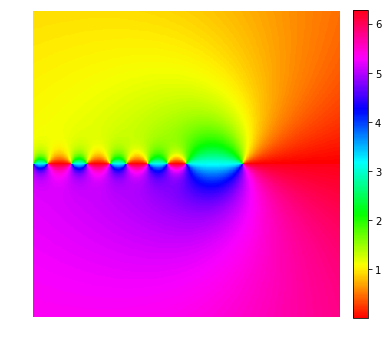

In [10]:
plot_complex(special.digamma)

## 3. 等角写像（Conformal transforamtion）のプロット
### 3.1. 方針1
複素関数のDomain Coloringで、 $f(z)$の偏角に応じて色分けするのではなく、$f(z)$ の格子（y=整数となる直線とx=整数となる直線の集合）からの距離に応じて色分けしてみる。

In [11]:
def plot_conformal1(complex_func):
    """ Domain Coloringの応用による等角写像のプロット """
    x, y = np.meshgrid(np.linspace(-4, 4, 400), np.linspace(-4, 4, 400))
    z = x + y*1j
    
    z2 = complex_func(z)
    #grid = (z2.real - np.floor(z2.real)) + (z2.imag - np.floor(z2.imag))
    grid = - np.log(0.001 + abs(z2.real - np.round(z2.real))) - np.log(0.001 + abs(z2.imag - np.round(z2.imag))) # 格子からの距離に対応
    im = plt.imshow(grid, origin="lower") # origin="lower": y軸を上向きにする

    plt.axis('off') # 軸の数値を非表示

まずは恒等写像をプロットしてみる。格子がそのまま現れている。

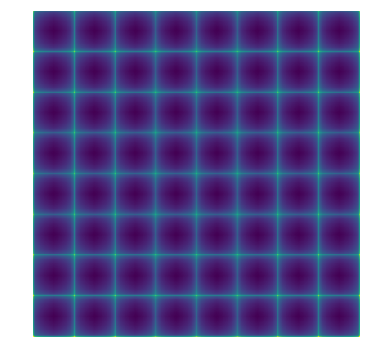

In [12]:
plot_conformal1(lambda z: z)

他にもプロットしてみる。以下の関数が本当に等角写像になっている（正則）かは確かめていないが、歪められた格子同士が直行してるっぽいことが見て取れる。

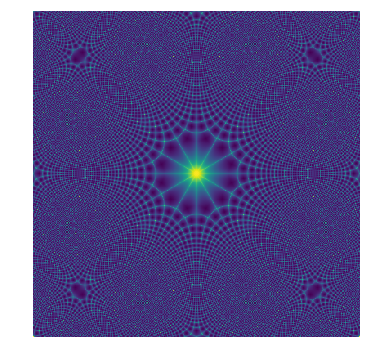

In [13]:
plot_conformal1(lambda z: z**3 + 1)

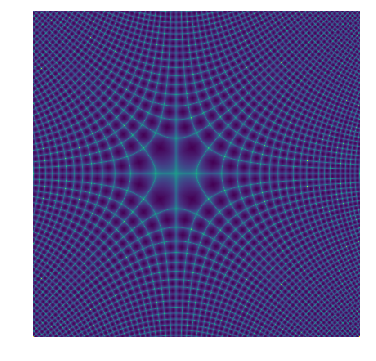

In [14]:
plot_conformal1(lambda z: (z**3-1)/(z-1))

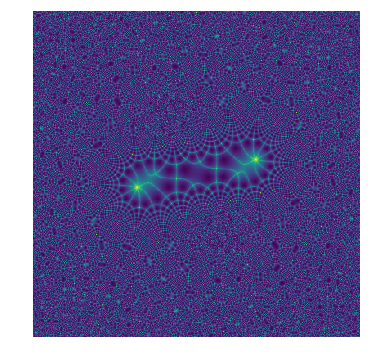

In [15]:
plot_conformal1(lambda z: (z*z-1)*(z*z-2-1j)**2 / (z*z+2+2j))

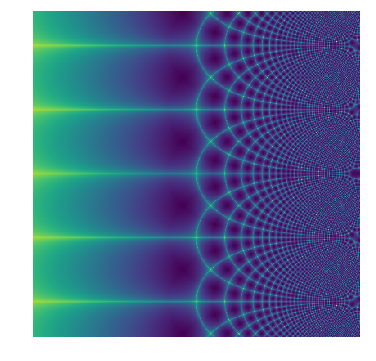

In [16]:
plot_conformal1(np.exp)

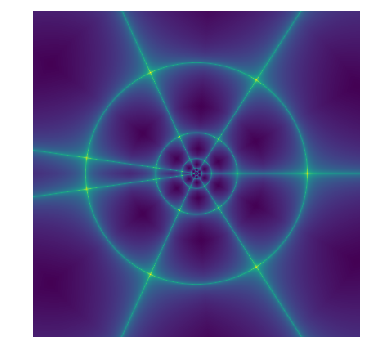

In [17]:
plot_conformal1(np.log)

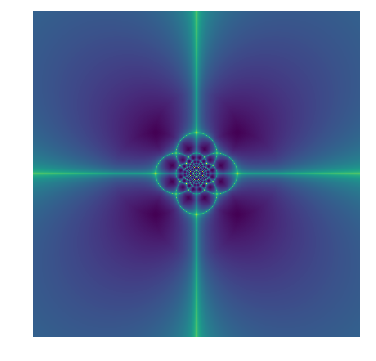

In [18]:
plot_conformal1(lambda z: 1/z)

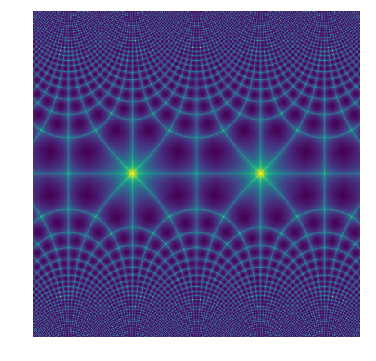

In [19]:
plot_conformal1(np.sin)

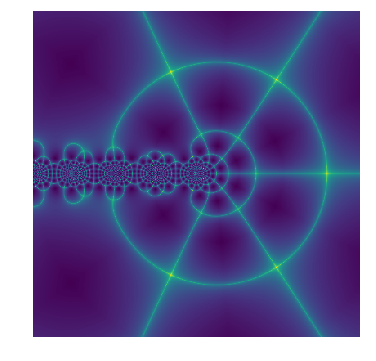

In [20]:
plot_conformal1(special.digamma)

### 3.2. 方針2
方針1の`plot_conformal1()`では、厳密には引数として受け取った関数の逆関数 $f^{-1}$ によって格子を歪めたものをプロットしていた。
本当は下図のように $f$  で格子を歪めたい。散布図を使うことにする。
<img width="100" src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/bb/Conformal_map.svg/1200px-Conformal_map.svg.png" alt="Conformal map.svg">

In [21]:
def plot_conformal2(complex_func):
    """ 散布図を用いた等角写像のプロット """
    x, y = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
    z = x + y*1j

    z2 = complex_func(z)
    grid = - np.log(0.001 + abs(x - np.round(x))) - np.log(0.001 + abs(y - np.round(y))) # 格子からの距離に対応

    plt.scatter(z2.real.flatten(), z2.imag.flatten(), c=grid.flatten(), s=0.1)
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)

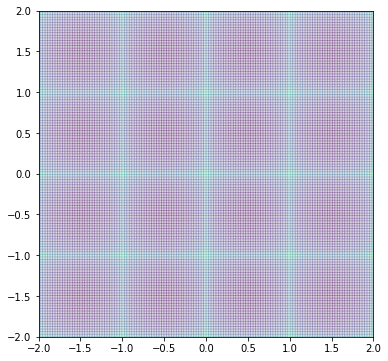

In [22]:
plot_conformal2(lambda z: z)

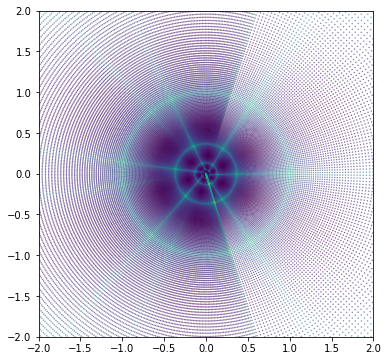

In [23]:
plot_conformal2(np.exp)

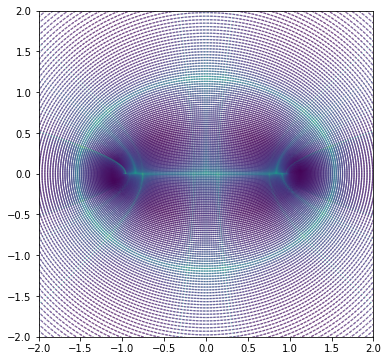

In [24]:
plot_conformal2(np.sin)

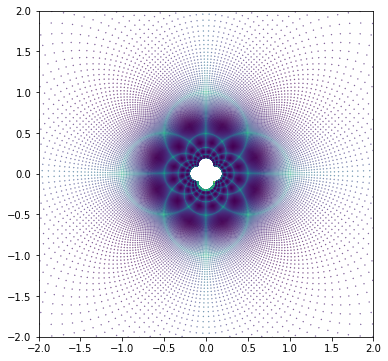

In [25]:
# ひまわりの種っぽい
plot_conformal2(lambda z: 1/z)